In [1]:
import pandas as pd
import numpy as np
import io
import statsmodels.formula.api as smf
import scipy.stats as stats
import seaborn as sns
import re

In [5]:
# Определим датафрейм
wage_df = pd.read_csv('https://raw.githubusercontent.com/artamonoff/Econometrica/master/python-notebooks/data-csv/wage1.csv')
wage_df['wage1'] = wage_df['wage'] # создадим столбец часов времени
# Отфильтруем датафрейм по полу
wage_male = wage_df[wage_df['female']==0] # Датафрейм для мужчин
wage_female = wage_df[wage_df['female']==1] # Датафрейм для женщин

In [6]:
wage_male

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,wage1
2,3.00,11,2,0,0,0,0,2,0,0,...,1,0,0,0,0,0,1.098612,4,0,3.00
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,1,0,1.791759,1936,784,6.00
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,1.667707,49,4,5.30
5,8.75,16,9,8,0,0,1,0,1,0,...,0,0,1,1,0,0,2.169054,81,64,8.75
6,11.25,18,15,7,0,0,0,0,1,0,...,1,0,0,1,0,0,2.420368,225,49,11.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
518,7.50,12,18,5,0,0,1,2,0,0,...,1,0,0,0,0,0,2.014903,324,25,7.50
519,4.75,13,47,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1.558145,2209,1,4.75
520,5.65,12,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1.731656,4,0,5.65
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,1,0,0,1.541159,169,324,4.67


In [10]:
wage_df['log(wage)']  = np.log(wage_df['wage'])
wage_df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq,wage1,log(wage)
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,1.131402,4,0,3.10,1.131402
1,3.24,12,22,2,0,1,1,3,1,0,...,1,0,0,0,1,1.175573,484,4,3.24,1.175573
2,3.00,11,2,0,0,0,0,2,0,0,...,0,0,0,0,0,1.098612,4,0,3.00,1.098612
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,1,0,1.791759,1936,784,6.00,1.791759
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,1.667707,49,4,5.30,1.667707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,1,1,0,0,2.708050,196,4,15.00,2.708050
522,2.27,10,2,0,0,1,0,3,0,0,...,0,0,1,0,0,0.819780,4,0,2.27,0.819780
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,1,0,0,1.541159,169,324,4.67,1.541159
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,2.447551,25,1,11.56,2.447551


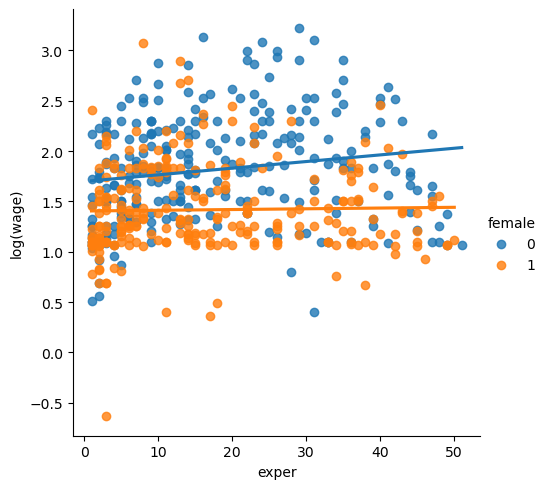

In [11]:
sns.lmplot(data = wage_df, x = 'exper', y = 'log(wage)', ci = None, hue = 'female')

In [13]:
wg = smf.ols(data= wage_df, formula='np.log(wage)~exper+I(exper**2)+smsa +married').fit()
wg_ml = smf.ols(data= wage_male, formula='np.log(wage)~exper+I(exper**2)+smsa +married').fit()
wg_fml = smf.ols(data= wage_female, formula='np.log(wage)~exper+I(exper**2)+smsa +married').fit()

In [15]:
print(f'RSS:{wg.ssr.round(2)}, RSS_1:{wg_ml.ssr.round(2)},RSS_2:{wg_fml.ssr.round(2)} ')

RSS:121.61, RSS_1:55.78,RSS_2:45.07 


In [17]:
F_obs =( wg.ssr - (wg_ml.ssr + wg_fml.ssr) )/((wg_ml.ssr + wg_fml.ssr)) * (len( wage_male ) + len( wage_female) - 10) / 5
F_obs

21.254052010338476

In [18]:
alpha = 0.05
stats.f.ppf(1-alpha,5,len( wage_male ) + len( wage_female) - 10 )

2.2314838288754557


Вывод:
$$
F_(obs)>F_(cr)
$$
данные согласуются с гипотизой Н1. Структурные изменения значимы